In [1]:
import pandas as pd

from discrete_env import DiscretePortfolioEnv
from stable_baselines3 import DQN

In [2]:
returns_df = pd.read_csv('returns_dataset.csv', parse_dates=['Date'])
returns_df.head()

,Date,AAPL,AXP,BA,DIS,GS,INTC,JNJ,KO,NKE,PG
0,2012-01-04,0.005374,0.000623,0.001482,0.014096,-0.006502,0.023227,-0.006071,-0.006273,0.014565,-0.000449
1,2012-01-05,0.011102,0.011608,-0.010763,0.016731,-0.001689,0.011550,-0.001222,-0.004734,-0.000611,-0.004191
2,2012-01-06,0.010454,-0.010861,0.006120,0.010380,-0.012265,-0.005906,-0.008716,-0.006343,-0.001732,-0.002405
3,2012-01-09,-0.001586,0.002486,0.007434,-0.004009,0.013595,0.008713,0.001543,0.000000,0.003674,0.004219
4,2012-01-10,0.003581,0.005786,0.006307,-0.003019,0.038441,0.004711,0.004158,0.005948,0.001220,-0.004652


In [3]:
env = DiscretePortfolioEnv(returns_df, episode_length=500)

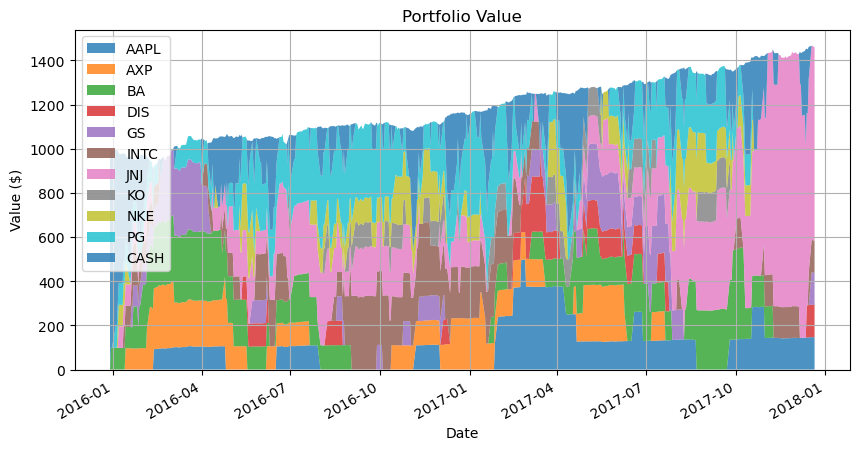

In [4]:
# Visualizing the environment
done = False
while not done:
	obs, reward, done, info = env.step(env.action_space.sample()) # take random action

env.render()
env.close()

In [5]:
# Creating and training a DQN model
model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10_000);

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 500      |
|    ep_rew_mean      | 0.389    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 423      |
|    time_elapsed     | 4        |
|    total_timesteps  | 2000     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 500      |
|    ep_rew_mean      | 0.35     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 421      |
|    time_elapsed     | 9        |
|    total_timesteps  | 4000     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 500      |
|    ep_rew_mean      | 0.296 

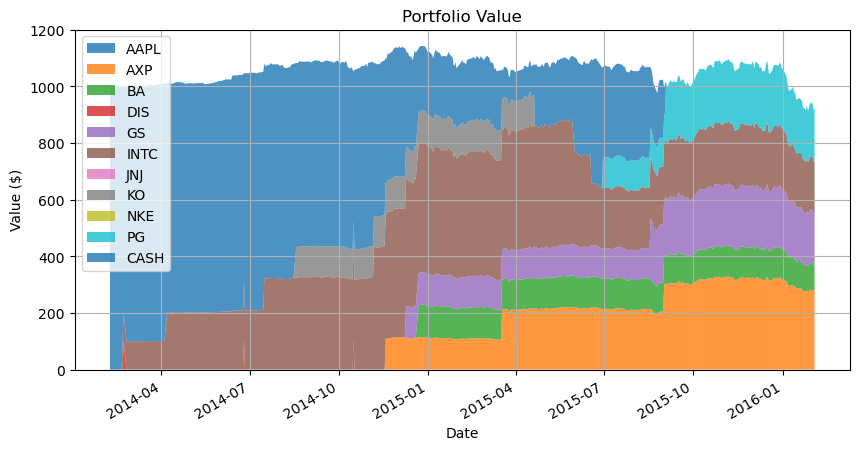

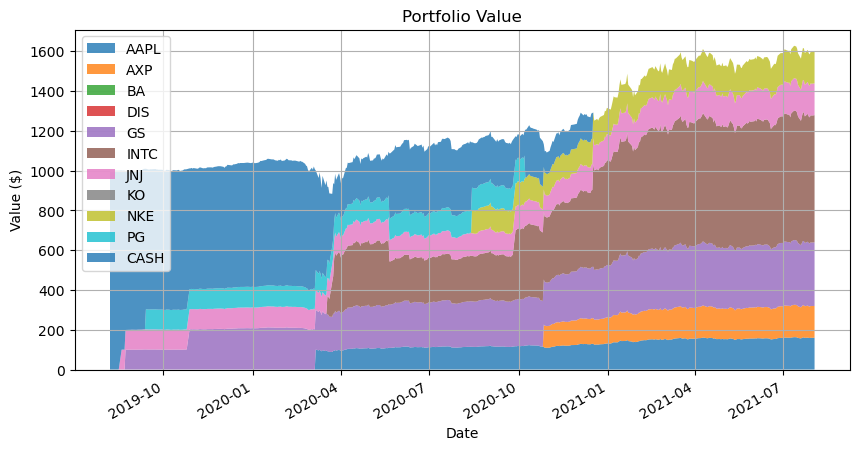

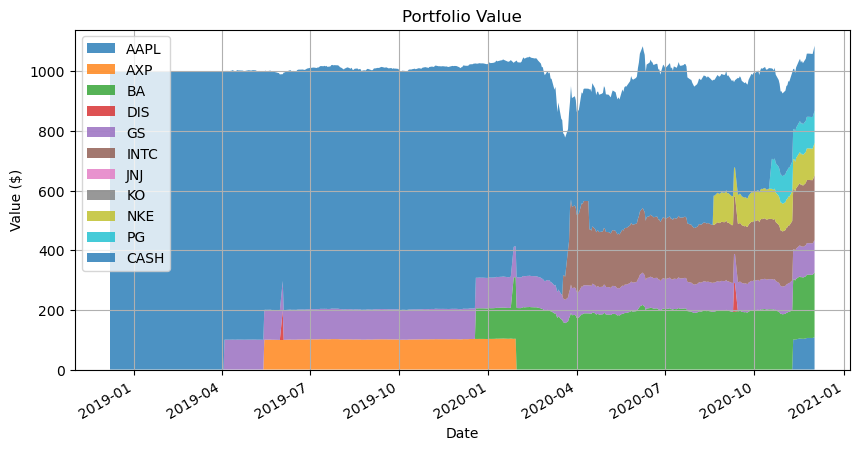

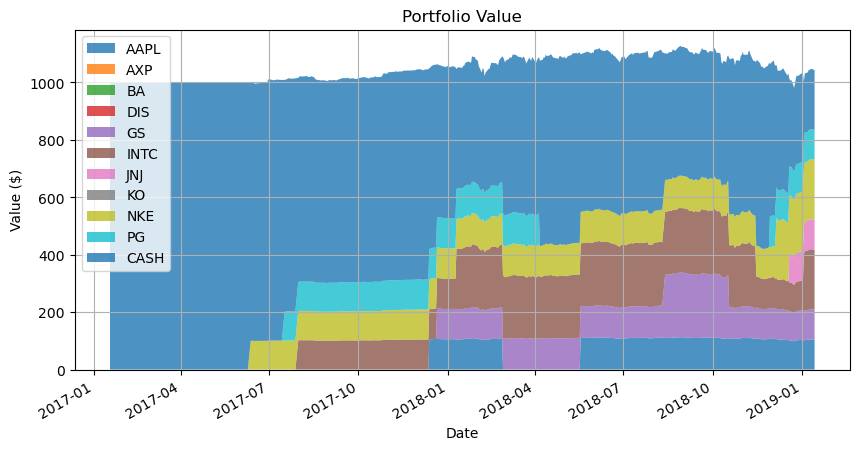

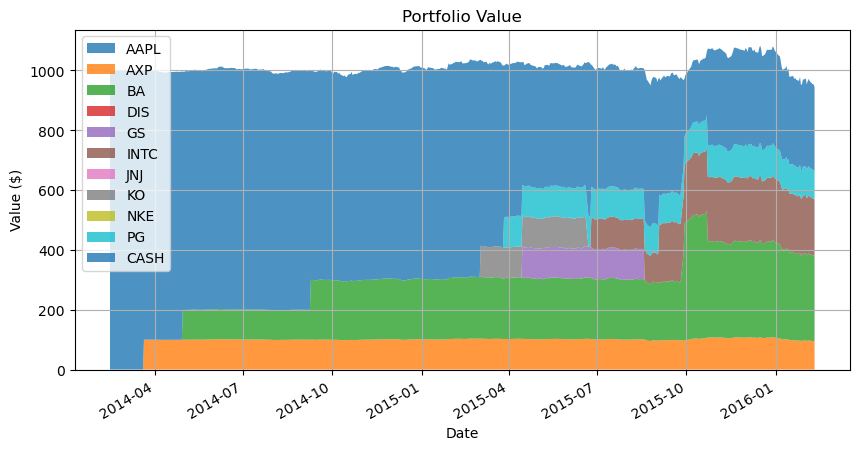

In [6]:
# Visualizing model performance
episodes = 5
for ep in range(episodes):
	obs = env.reset()
	done = False
	while not done:
		action, _states = model.predict(obs) # pass observation to model to get predicted action
		obs, reward, done, info = env.step(action) # pass action to env and get info back
	env.render() # show the environment on the screen

env.close()